In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec
from scipy import polyval, polyfit
from scipy.optimize import curve_fit

In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [3]:
calib_ = pd.read_csv("../calibrators/allzpa_labels.csv", sep=',')

# calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]

calib_maglim = [44536,68535,5896,48334, 40809]  # reject

# calib_weird = [68535, 28378, 42081, 39461, 44536, 21102,50073, 5896, 15345] # infrared
calib_weird = [68535, 28378, 42081, 39461, 44536]   # optical


for col in calib_.columns:
    newcol = col.strip()
    calib_.rename(columns={col:newcol}, inplace=True)


    
    
calib_['I'] = calib_.i-calib_.dm19



calib_ = calib_[(calib_.I>-17)&(calib_.i>0)]
    
    
    
calib_.head(20)

,PGC,So,Name,dm19,inc,lgWmxi,eWi,Mu,Mg,Mr,...,NW1,MW2,u,g,r,i,z,W1,W2,I
23,3974,1,UGC685,28.41,64,1.880,0.029,-13.98,-14.99,-15.33,...,0.00,0.00,14.43,13.42,13.08,12.90,12.79,0.00,0.00,-15.51
27,6699,1,UGC1281,28.61,90,2.034,0.008,-15.67,-16.28,-16.46,...,-15.39,-14.85,12.94,12.33,12.15,11.74,11.79,13.22,13.76,-16.87
37,19871,1,UGC3600,30.04,81,1.999,0.036,-14.82,-15.37,-15.55,...,0.00,0.00,15.22,14.67,14.49,14.25,14.55,0.00,0.00,-15.79
39,22277,1,UGC4115,29.48,67,1.890,0.023,-14.94,-15.47,-15.63,...,-14.83,-14.20,14.54,14.01,13.85,13.63,13.70,14.65,15.28,-15.85
45,28378,1,UGC5288,30.31,45,2.095,0.060,-15.73,-16.46,-16.80,...,0.00,0.00,14.58,13.85,13.51,13.35,13.32,0.00,0.00,-16.96
50,38148,1,NGC4068,28.21,53,1.883,0.059,-14.72,-15.47,-15.70,...,-15.09,-14.64,13.49,12.74,12.51,12.37,12.35,13.12,13.57,-15.84
57,41020,1,UGC7599,28.37,65,1.882,0.041,-13.11,-13.86,-14.02,...,-12.94,-12.10,15.26,14.51,14.35,14.21,14.26,15.43,16.27,-14.16
59,41093,1,KK149,29.65,52,1.997,0.088,-13.94,-14.65,-14.93,...,0.00,0.00,15.71,15.00,14.72,14.55,14.52,0.00,0.00,-15.10
76,46127,1,UGC8331,28.22,76,1.745,0.049,-13.74,-14.37,-14.55,...,-13.57,-13.02,14.48,13.85,13.67,13.54,13.76,14.65,15.20,-14.68
80,49448,1,UGC8837,29.30,79,1.959,0.025,-16.06,-16.38,-16.67,...,-15.90,-15.20,13.24,12.92,12.63,12.45,12.35,13.40,14.10,-16.85


In [10]:
df.columns

Index(['pgc', 'Vh', 'Vls', 'V3k', 'Vmod', 'f_cosmology', 'logWimx',
       'logWimx_e', 'inc', 'Sqlt', 'Wqlt', 'DM_best', 'dDM_best', 'DMr',
       'dDMr', 'RMS_r', 'DMr_raw', 'DMi', 'dDMi', 'RMS_i', 'DMi_raw', 'DMz',
       'dDMz', 'RMS_z', 'DMz_raw', 'DM_w1', 'dDM_w1', 'RMS_w1', 'DMw1_raw',
       'ggg', 'rrr', 'iii', 'zzz', 'w1', 'w2', 'RA', 'DEC', 'gl', 'gb', 'sgl',
       'sgb', 'pgc1', 'Nest', 'Vmodg', 'Nkt', 'N15', 'sglg', 'sgbg', 'RS',
       'P0', 'DM_src', 'logD', 'DM', 'M_r', 'M_i', 'M_z'],
      dtype='object')

In [23]:
rej = pd.read_csv("oreject60.csv", sep=',')

rej.head()

len(rej)

60

In [11]:
# df = pd.read_csv("CF4_TF_distances.csv", sep='|')
df = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')


for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)

df['logD'] = np.log10(df.Vmod / 75.)
df['DM'] = 5*df.logD + 25 
df['M_r'] = df['rrr'] - df.DM
df['M_i'] = df['iii'] - df.DM
df['M_z'] = df['zzz'] - df.DM
df['M_1'] = np.asarray([np.float64(x) for x in df['w1'].values]) - df.DM.values
df['M_2'] = np.asarray([np.float64(x) for x in df['w2'].values]) - df.DM.values

print(df.columns)
print(len(df))

df.head()

Index(['pgc', 'Vh', 'Vls', 'V3k', 'Vmod', 'f_cosmology', 'logWimx',
       'logWimx_e', 'inc', 'Sqlt', 'Wqlt', 'DM_best', 'dDM_best', 'DMr',
       'dDMr', 'RMS_r', 'DMr_raw', 'DMi', 'dDMi', 'RMS_i', 'DMi_raw', 'DMz',
       'dDMz', 'RMS_z', 'DMz_raw', 'DM_w1', 'dDM_w1', 'RMS_w1', 'DMw1_raw',
       'ggg', 'rrr', 'iii', 'zzz', 'w1', 'w2', 'RA', 'DEC', 'gl', 'gb', 'sgl',
       'sgb', 'pgc1', 'Nest', 'Vmodg', 'Nkt', 'N15', 'sglg', 'sgbg', 'RS',
       'P0', 'DM_src', 'logD', 'DM', 'M_r', 'M_i', 'M_z', 'M_1', 'M_2'],
      dtype='object')
10737


/home/ehsan/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ehsan/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pgc,Vh,Vls,V3k,Vmod,f_cosmology,logWimx,logWimx_e,inc,Sqlt,...,RS,P0,DM_src,logD,DM,M_r,M_i,M_z,M_1,M_2
0,2,5004,5296,4726,4786,1.013,2.744,0.029,52,0,...,2,2.02,2,1.804911,34.024557,-34.024557,-34.024557,-34.024557,-22.134557,-21.504557
1,4,4458,4706,4109,4154,1.011,2.189,0.014,85,5,...,2,-2.75,1,1.743405,33.717026,-18.387026,-18.597026,-18.647026,-17.647026,-17.277026
2,12,6548,6685,6195,6297,1.016,2.606,0.021,82,0,...,2,0.56,2,1.924072,34.620362,-34.620362,-34.620362,-34.620362,-21.030362,-20.390362
3,16,5667,5809,5312,5387,1.014,2.515,0.025,65,5,...,2,0.92,1,1.856286,34.281429,-20.421429,-20.701429,-20.881429,-20.291429,-19.581429
4,55,4779,5052,4454,4507,1.012,2.260,0.025,80,5,...,2,-2.83,1,1.778826,33.894131,-18.574131,-18.674131,-18.724131,-17.694131,-17.264131


In [12]:
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]

calib_maglim += [44536,68535,5896,48334, 40809]  # reject

# calib_maglim += [68535, 28378, 42081, 39461, 44536, 21102,50073, 5896, 15345] # infrared
calib_maglim += [68535, 28378, 42081, 39461, 44536]   # optical

df['pgc'] = df['pgc'].apply(lambda x: x if not x in rej.PGC.values else None)
df['pgc'] = df['pgc'].apply(lambda x: x if not x in calib_maglim else None)

print(len(df[df.pgc.isna()]))

df = df.dropna()
df.set_index('pgc', inplace=True)

print(len(df))

90
10636


In [13]:
band3 = "iii"
band1 = "i"

Band = "M_i"

In [24]:
calib = pd.read_csv("../calibrators/allzpa_labels.csv", sep=',')

for col in calib.columns:
    newcol = col.strip()
    calib.rename(columns={col:newcol}, inplace=True)
            
calib.set_index('PGC', inplace=True)

# calib = calib.join(df[[band3, "logWimx", "logWimx_e", "Sqlt", "Wqlt", "Vmod"]]).dropna()
calib = calib.join(df[["Vmod", "Sqlt", "Wqlt"]]).dropna()
# calib = calib[(calib.Sqlt>2)]
              
calib = calib[(calib.Sqlt>2) & (calib[band3]>0)]
calib["I"] = calib[band3] - calib.dm19

print(len(calib))
calib.head()

KeyError: 'iii'

In [15]:
calib_logH = np.log10(calib.Vmod)-(calib.dm19-25)/5

10**np.median(calib_logH.values)


72.48017310642

In [16]:
def bilinear(x, m1, b1, m2, eps):
    x0 = -20+eps 
    b2 = b1 - x0*(m2-m1)
    y1 = m1 * x + b1
    y2 = m2 * x + b2
    y = np.asarray([y1[i] if x[i]<=x0 else y2[i] for i in range(len(x))])
    return y



dff = df[(df.Vmod>4000) & (df[band3]>0) & (df.Sqlt>2)]
mag_f = dff[Band].values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff['logWimx_e'].values
fit, cov = curve_fit(bilinear, mag_f, logWimx_f-2.5, sigma=np.sqrt(logWimx_e_f**2+0.01**2))
M0 = -20+fit[3] 

def bilinear2(x, m1, b1, m2, b2):
    y1 = m1 * x + b1
    y2 = m2 * x + b2
    y = np.asarray([y1[i] if x[i]<=M0 else y2[i] for i in range(len(x))])
    return y

fit, cov = curve_fit(bilinear2, mag_f, logWimx_f-2.5, sigma=np.sqrt(logWimx_e_f**2+0.01**2))
m1 = fit[0]
b1 = fit[1]
m2 = fit[2]
b2 = fit[3]

def bilinear_zp(x, zp):
    
    return bilinear2(x+zp, m1, b1, m2, b2)



# dM, cov_dm = curve_fit(bilinear_zp, calib.I.values, calib.logWimx.values-2.5, 
#                      sigma=np.sqrt(calib.logWimx_e.values**2+0.01**2))



fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1




dff = df[(df.Vmod>4000) & (df[band3]>0) & (df.Sqlt>2)]
ax.plot(dff.logWimx.values, dff[Band].values-dM[0], '.', alpha=0.1, color='orange')

###############################################################################################
###############################################################################################
# X = dff.logWimx.values
# Y = dff[Band].values-dM[0]


# for i in np.arange(2.,2.9,0.05):
#     xp = []
#     yp = []
#     for ii in range(len(X)):
#         xi = X[ii]
#         if xi>=i and xi<i+0.05:
#             xp.append(xi)
#             yp.append(Y[ii])
#     if len(xp)>0:
#         ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
#                     color='r', ms=6)  
###############################################################################################
###############################################################################################

# ax.plot(calib.logWimx.values, calib.I.values, 'ko', alpha=1, ms=4)
# ax.plot(calib_.lgWmxi.values, calib_.I.values, 'ko', alpha=1, ms=4, mfc='white')

v = np.linspace(-24,M0-dM[0],100)
u = m1*(v+dM[0]) + b1 + 2.5
ax.plot(u, v, '-', color='black')
v = np.linspace(M0-dM[0],-14,100)
u = m2*(v+dM[0]) + b2 + 2.5
ax.plot(u, v, '-', color='purple')

ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$M^{75}_{i} \/\/ [AB]$', fontsize=18)
set_axes(ax, (1.7,3), (-16,-24))

#########################################################################################
m1 = fit[0] ; dm1 = cov[0][0]
b1 = fit[1] ; db1 = cov[1][1]
m2 = fit[2] ; dm2 = cov[2][2]
b2 = fit[3] ; db2 = cov[3][3]

m1e = np.sqrt(dm1)
b1e = np.sqrt(db1)
mbe = cov[1,0]    
m10 = 1./m1
b10 = -b1/m1
dm10 = np.abs(m1e/m1**2)
db10 = np.sqrt((b10**2 )*(b1e**2/b1**2+m1e**2/m1**2-2*mbe/m1/b1))


m2e = np.sqrt(dm2)
b2e = np.sqrt(db2)
mbe = cov[2,3]    
m20 = 1./m2
b20 = -b2/m2
dm20 = np.abs(m2e/m2**2)
db20 = np.sqrt((b20**2 )*(b2e**2/b2**2+m2e**2/m2**2-2*mbe/m2/b2))



print(m10, b10, dm10, db10)
print(m20, b20, dm20, db20)
print(M0-dM[0], cov_dm[0][0])
# (-7.602701011543559, -20.987931668870026, 0.08533213678309576, 0.010051521822623736)
# (-10.74639929921481, -21.21504791045947, 0.2253335371429567, 0.04003184638690257)
# -20.316893533266967
logW0 = 0.5*(m1*(M0)+b1+2.5+m2*(M0)+b2+2.5)

b10_f = b10-dM[0]
b20_f = b20-dM[0]

db10_f = np.sqrt(cov_dm[0][0]+db10**2)
db20_f = np.sqrt(cov_dm[0][0]+db20**2)
print("zp1", b10_f, db10_f)
print("zp2", b20_f, db20_f)

Mt1 = m10*(logW0-2.5) + b10_f
Mt2 = m20*(logW0-2.5) + b20_f

Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
x0 = 0.95*Xlm[0]+0.05*Xlm[1]
y0 = 0.1*Ylm[0]+0.90*Ylm[1]
ax.text(x0,y0, r"$Slope_H = $"+"%.2f" % m10+'$\pm$'+"%.2f" % dm10, fontsize=12, color='k')
y0 = 0.2*Ylm[0]+0.80*Ylm[1]
ax.text(x0,y0, r"$ZP_H = $"+"%.2f" % b10_f+'$\pm$'+"%.2f" % db10_f, fontsize=12, color='k')
y0 = 0.3*Ylm[0]+0.70*Ylm[1]
ax.text(x0,y0, r"$M_0 = $"+"%.2f" % (0.5*(Mt1+Mt2))+'$\pm$'+"%.2f" % np.sqrt(cov_dm[0][0]), fontsize=12, color='maroon')
y0 = 0.4*Ylm[0]+0.60*Ylm[1]
ax.text(x0,y0, r'$log \/ W_{mx_0}^i = $'+"%.2f" % (logW0), fontsize=12, color='maroon')



Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
x0 = 0.42*Xlm[0]+0.58*Xlm[1]
y0 = 0.80*Ylm[0]+0.2*Ylm[1]
ax.text(x0,y0, r"$Slope_L = $"+"%.2f" % m20+'$\pm$'+"%.2f" % dm20, fontsize=12, color='purple')
y0 = 0.90*Ylm[0]+0.10*Ylm[1]
ax.text(x0,y0, r"$ZP_L = $"+"%.2f" % b20_f+'$\pm$'+"%.2f" % db20_f, fontsize=12, color='purple')

ax.vlines(x=logW0, ymin=-16, ymax=Mt1, color='maroon', linestyle='dotted')
ax.hlines(y=Mt1, xmin=1.7, xmax=logW0, color='maroon', linestyle='dotted')

# ax.plot(gp_yp_test, x_test, 'r-', alpha=1)
# ax.fill_betweenx(x_test, gp_yp_test-3*np.sqrt(gp_yp_test_std), gp_yp_test+3*np.sqrt(gp_yp_test_std),
#                 color='red', alpha=0.2)

Mt1, Mt2, dM[0]

AttributeError: 'DataFrame' object has no attribute 'I'

In [17]:
from sklearn.model_selection import train_test_split
import george
from george import kernels

def GPR(X, y, lnlikelihood=True):
  '''
  The output of this function is another function, either the lnlikelihood, or 
  the gp (the gaussian process regressor that is dfined by giving theta)
  '''
  n = X.shape[1]
    
  def step(theta):

        L = np.exp(theta[:n])
        sigma = np.exp(theta[n])   
        yerr = np.exp(theta[n+1])
        
        kernel = sigma * kernels.ExpSquaredKernel(np.ones(n), ndim=n)

        gp = george.GP(kernel)

        if lnlikelihood:
            
          gp = george.GP(kernel)
          gp.compute(X / np.vstack([L]*X.shape[0]), yerr)
       
          return -gp.lnlikelihood(y)
        else:
          X0 = X / np.vstack([L]*X.shape[0])
          gp.compute(X0, yerr)
          return gp
      
  return step

In [18]:
dff = df[(df.Vmod>4000) & (df[band3]>0) & (df.Sqlt>2)]

Y = dff.logWimx.values
Ye = dff.logWimx_e.values
X = dff[Band].values

# X = X[indx_del]
# Y = Y[indx_del]
# Ye = Ye[indx_del]

XS2 = X.reshape(len(X), 1)
ys2 = Y
ys2e = Ye

len(dff)

5398

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(XS2)

def Xi2_swarm(x):
  
  nParticle = x.shape[0]
  out = np.zeros(nParticle)

  for train_index, cross_index in kf.split(XS2):
    
      X_train, X_cross = XS2[train_index], XS2[cross_index]
      y_train, y_cross = ys2[train_index], ys2[cross_index]
      ye_train, ye_cross = ys2e[train_index], ys2e[cross_index]

      n = X_cross.shape[1]
      m = X_cross.shape[0]

      for n_iter in range(nParticle):
          
          theta = x[n_iter,:]

          L = np.exp(theta[:n])

          gp = GPR(X_train, y_train, lnlikelihood=False)(theta)
          gp_yp_cross, gp_yp_cross_std = gp.predict(y_train, X_cross/np.vstack([L]*m), return_var=True)

          out[n_iter] += np.sum((y_cross - gp_yp_cross)**2/ye_cross**2)

  return out

In [20]:
# Import modules
import numpy as np
from pyswarms.single.global_best import GlobalBestPSO
# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [21]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options)

# Perform optimization
cost, pos = optimizer.optimize(Xi2_swarm, iters=10)

2021-01-05 21:32:10,815 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/10


KeyboardInterrupt: 

In [22]:
pos
# pos = np.asarray([2.57860022, 3.42156733, 0.33875042])

array([ 1.29136006,  0.53942835, -1.092689  ])

In [23]:
truths = pos
gp = GPR(XS2, ys2, lnlikelihood=False)(truths)

x_test = np.linspace(-25, 0, 10000)
XS_test = x_test.reshape(10000,1)

n = XS2.shape[1]
m_test = XS_test.shape[0]
m = XS2.shape[0]
L = np.exp(truths[:n])


gp_yp, gp_yp_std = gp.predict(ys2, XS2/np.vstack([L]*m), return_var=True)
gp_yp_test, gp_yp_test_std = gp.predict(ys2, XS_test/np.vstack([L]*m_test), return_var=True)

(<AxesSubplot:label='b6268605-96b9-46e9-b3da-2689ef9bd6e2'>,
 <AxesSubplot:label='af58b75f-5775-45b6-a1a0-5b114c0fd201'>)

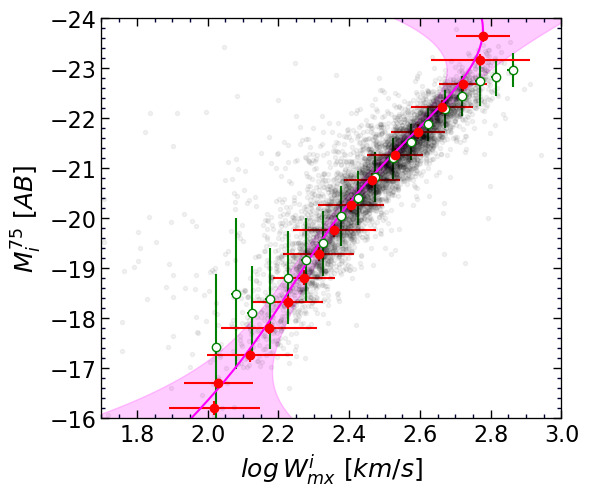

In [24]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1

# dff = df[(df.Vmod>4000) & (df[band3]>0) & (df.Sqlt>2)]

Y = dff.logWimx.values
Ye = dff.logWimx_e.values
X = dff[Band].values


# ax.plot(Y[indx_del], X[indx_del], 'k.', alpha=0.05)
ax.plot(Y, X, 'k.', alpha=0.05)





# ax.plot(gp_yp_test_, x_test, 'g-', alpha=1)
# ax.fill_betweenx(x_test, gp_yp_test_-3*np.sqrt(gp_yp_test_std_), gp_yp_test_+3*np.sqrt(gp_yp_test_std_),
#                 color='green', alpha=0.2)

ax.set_ylim(-16, -24)


###############################################################################################
for i in np.arange(2.,2.9,0.05):
    xp = []
    yp = []
    for ii in range(len(Y)):
        xi = Y[ii]
        if xi>=i and xi<i+0.05:
            xp.append(xi)
            yp.append(X[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='g', ms=6, mfc='white')   
###############################################################################################

for i in np.arange(-24,-16,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(yp), np.median(xp), yerr=np.std(xp), xerr=np.std(yp), fmt='o', 
                    color='r', ms=6)  
###############################################################################################

ax.plot(gp_yp_test, x_test, 'r', alpha=1, color='magenta')

ax.fill_betweenx(x_test, gp_yp_test-3*np.sqrt(gp_yp_test_std), gp_yp_test+3*np.sqrt(gp_yp_test_std),
                color='magenta', alpha=0.2)


ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$M^{75}_{i} \/\/ [AB]$', fontsize=18)
set_axes(ax, (1.7,3), (-16,-24))

In [25]:
np.median(Ye)*7.60

0.1596

<AxesSubplot:>

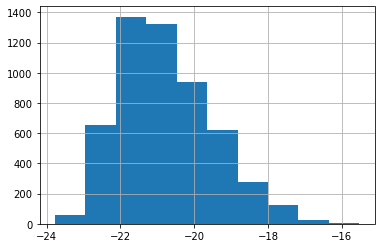

In [26]:
dff[Band].hist()

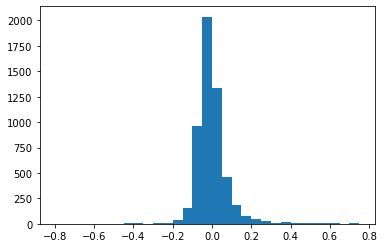

In [27]:
delta = gp_yp-ys2

bins = np.arange(-0.8,0.8,0.05)

plt.hist(delta, bins=bins)

indx_del, = np.where(np.abs(delta)<0.3)

In [28]:
np.mean(delta)

-5.519929005961894e-05

In [29]:
# from scipy.interpolate import interp1d


# truths = pos
# gp = GPR(XS2, ys2, lnlikelihood=False)(truths)



# n = XS2.shape[1]
# m = XS2.shape[0]
# L = np.exp(truths[:n])




# def GP_zp(I, zp):
#     x_test = I+zp
#     XS_test = x_test.reshape(len(x_test),1)
#     m_test = XS_test.shape[0]
#     gp_yp_test, gp_yp_test_std = gp.predict(ys2, XS_test/np.vstack([L]*m_test), return_var=True)
    
#     return gp_yp_test
    
    

# dM_, cov_dm = curve_fit(GP_zp, calib.I.values, calib.logWimx.values, 
#                      sigma=np.sqrt(calib.logWimx_e.values**2+0.01**2))

# dM_

In [30]:
myDict = {"logW": gp_yp_test, "Mag": x_test}
myDF = pd.DataFrame.from_dict(myDict)

myDF.to_csv("GP_TF.csv")

In [31]:
myDF = pd.read_csv("GP_TF.csv")
myDF = myDF[myDF.Mag<-14]
logW = dff.logWimx.values

from scipy.interpolate import interp1d

minW = myDF.logW.values.min()
maxW = myDF.logW.values.max()


f1 = interp1d(myDF.logW.values, myDF.Mag.values, kind='linear')



dff = dff[(dff.logWimx>minW)&(dff.logWimx<maxW)]
dff['I'] = f1(dff.logWimx)

minW

1.6382023505604302

In [32]:
tf = dff
tf['delta'] = tf.M_i-tf.I
tf.head()

,Vh,Vls,V3k,Vmod,f_cosmology,logWimx,logWimx_e,inc,Sqlt,Wqlt,...,DM_src,logD,DM,M_r,M_i,M_z,M_1,M_2,I,delta
pgc,,,,,,,,,,,,,,,,,,,,,
4.0,4458,4706,4109,4154,1.011,2.189,0.014,85,5,4,...,1,1.743405,33.717026,-18.387026,-18.597026,-18.647026,-17.647026,-17.277026,-18.092054,-0.504972
16.0,5667,5809,5312,5387,1.014,2.515,0.025,65,5,5,...,1,1.856286,34.281429,-20.421429,-20.701429,-20.881429,-20.291429,-19.581429,-21.214340,0.512911
55.0,4779,5052,4454,4507,1.012,2.260,0.025,80,5,4,...,1,1.778826,33.894131,-18.574131,-18.674131,-18.724131,-17.694131,-17.264131,-18.878873,0.204742
68.0,7664,7740,7338,7480,1.019,2.390,0.043,57,5,5,...,1,1.998840,34.994202,-20.384202,-20.474202,-20.654202,-19.964202,-19.454202,-20.211553,-0.262649
70.0,6800,7040,6447,6557,1.017,2.636,0.005,90,5,5,...,1,1.941644,34.708220,-21.248220,-21.468220,-21.688220,-21.168220,-20.598220,-22.085984,0.617764


0.11431664742820224
0.8161137201499982


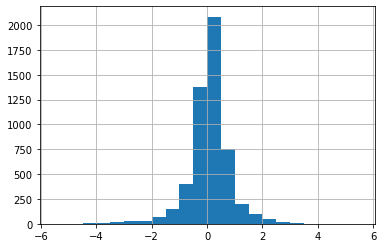

In [33]:
bins = np.arange(-5.5, 6, 0.5)

tf.delta.hist(bins=bins)

print(np.median(tf.delta.values))
print(np.std(tf.delta.values))

4591.0 0.15205342496368246
5417.0 0.16339204439071153
6612.0 0.11957985452179187
7416.0 0.1076405304012269
8486.5 0.10282299702131503
9467.0 0.07334193779160003
10529.0 0.14615713501460093
11485.5 0.04242784961675028
12425.0 0.05939347511989901
13450.0 0.07334976561713447
14410.0 0.0011956095434051406
15509.0 0.18976854726244952
16577.0 -0.4369894549420472
17270.0 -0.11456695607187406
18238.0 -0.08562237964281216
19330.0 0.22307590925283804
2.594234158736432


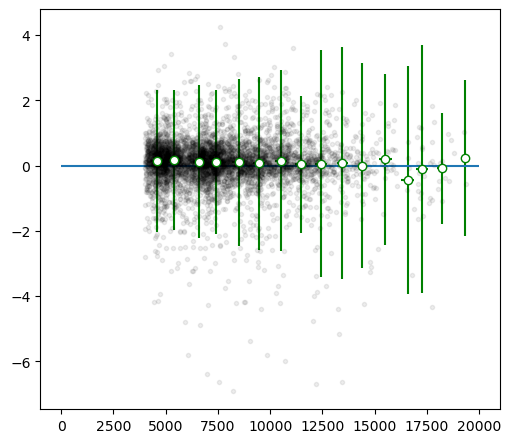

In [34]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1



X = tf.Vmod.values
Y = tf.delta.values

plt.plot(X, Y, 'k.', alpha=0.07)
listjzg=[]
for i in np.arange(4000,20000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=3*np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='g', ms=6, mfc='white')   
        
        print(np.median(xp), np.median(yp))
        listjzg.append(3.0*np.std(yp))
        
listjzg = np.asarray(listjzg)

print(np.median(listjzg))

ax.hlines(0,0,20000)

-23.772789077824992 -1.157082330586121
-23.15661210520386 0.20260145332237656
-22.664077459991724 0.7529770526771529
-22.213126060459512 0.1338105138179877
-21.727341904915697 0.06332630346653545
-21.252242878503736 0.06544455978664132
-20.75519528385825 0.089816059133625
-20.26582311449445 0.10171019205961684
-19.75898457167622 0.17511006270987295
-19.281560945391544 0.19122592427467922
-18.807348716267008 0.26073676426269543
-18.315453460089785 0.2483788263302742
-17.811178120492908 0.13775212810255155
-17.25849065934698 0.1778992802456898
-16.69270238052506 -0.19496629737485094
-16.19963169809167 0.43539886851926113
2.522382242160524


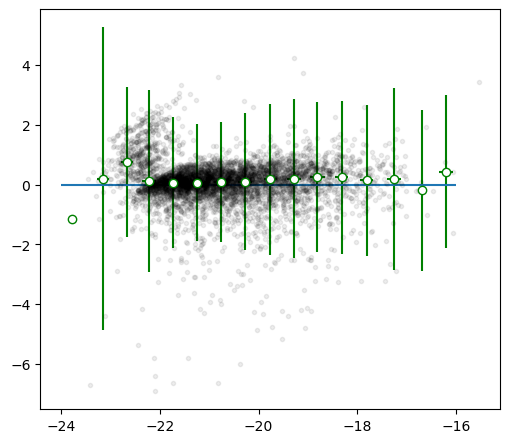

In [35]:
fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1



X = tf.M_i.values
Y = tf.delta.values

plt.plot(X, Y, 'k.', alpha=0.07)
listjzg=[]
for i in np.arange(-24, -16, 0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=3*np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='g', ms=6, mfc='white')   
        
        print(np.median(xp), np.median(yp))
        listjzg.append(3.0*np.std(yp))
        
listjzg = np.asarray(listjzg)

print(np.median(listjzg))

ax.hlines(0, -24, -16)

In [36]:
len(dff)

5314

In [37]:
dff=dff[np.abs(dff.delta)<1.5]